In [19]:
import os
import os.path as osp
from glob import glob
from tqdm.auto import tqdm
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import librosa

import sys
sys.path.append('/root/mediazen/speech2anim/')

from utils import plot_spectrogram

In [4]:
data_dir = '/root/mediazen/speech2anim/merged_essentials'
essentials_dir = [d.path for d in os.scandir(data_dir)]
audio_path, shape_path = essentials_dir
audio_path, shape_path

('/root/mediazen/speech2anim/merged_essentials/audio_ggongggong.pt',
 '/root/mediazen/speech2anim/merged_essentials/shape_ggongggong.pt')

In [5]:
audio_pt = torch.load(audio_path)
shape_pt = torch.load(shape_path)

len(audio_pt), len(shape_pt)

(4, 5)

In [7]:
audio_pt[3].shape, shape_pt[4].shape

(torch.Size([598]), torch.Size([598]))

In [12]:
len_spec = audio_pt[3]
len_shape = shape_pt[4]

idx = 400

len_spec[idx], len_shape[idx]

(tensor(4085, dtype=torch.int32), tensor(2457, dtype=torch.int32))

In [14]:
## check hynew data

data_dir = '/root/mediazen/speech2anim/essentials/essentials_hynew/'
essentials_dir = [d.path for d in os.scandir(data_dir) if d.path[-2:] == 'pt']
audio_path, shape_path = essentials_dir
audio_path, shape_path

('/root/mediazen/speech2anim/essentials/essentials_hynew/audio_ggongggong.pt',
 '/root/mediazen/speech2anim/essentials/essentials_hynew/shape_ggongggong.pt')

In [15]:
audio_pt = torch.load(audio_path)
shape_pt = torch.load(shape_path)

torch.Size([4786, 161])


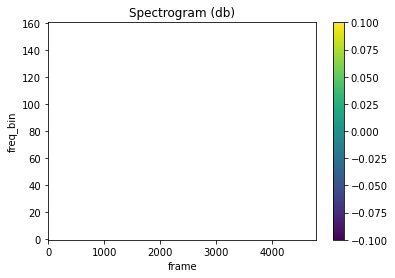

,Timecodes,JawForward,JawOpen,MouthClose,MouthFunnel,MouthPucker,MouthDimpleLeft,MouthDimpleRight,MouthStretchLeft,MouthStretchRight,MouthRollLower,MouthRollUpper,MouthShrugLower,MouthShrugUpper,MouthPressLeft,MouthPressRight,CheekPuff
0,1.804542e+10,0.001882,0.005914,0.007011,0.007136,0.021850,0.002155,0.002515,0.010563,0.010917,0.005494,0.002662,0.002400,0.000000,0.007176,0.005939,0.003748
1,1.804542e+10,0.001892,0.005907,0.007002,0.007097,0.021761,0.002162,0.002523,0.010611,0.010980,0.005529,0.002648,0.002553,0.000000,0.007163,0.005914,0.003685
2,1.804542e+10,0.001904,0.005892,0.006984,0.007054,0.021678,0.002169,0.002532,0.010655,0.011047,0.005557,0.002633,0.002713,0.000000,0.007157,0.005891,0.003625
3,1.804542e+10,0.001914,0.005881,0.006968,0.007002,0.021592,0.002147,0.002507,0.010687,0.011098,0.005578,0.002610,0.002860,0.000000,0.007126,0.005848,0.003564
4,1.804542e+10,0.001931,0.005886,0.006967,0.006969,0.021507,0.002147,0.002510,0.010743,0.011183,0.005620,0.002599,0.003036,0.000000,0.007123,0.005825,0.003514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2873,1.805422e+10,0.003900,0.007670,0.007694,0.010319,0.029793,0.011531,0.012816,0.015513,0.014817,0.012865,0.005321,0.031761,0.021034,0.024213,0.023090,0.005755
2874,1.805422e+10,0.003712,0.007471,0.007446,0.009969,0.029164,0.011081,0.012304,0.014966,0.014295,0.012316,0.005192,0.029451,0.019462,0.023196,0.022122,0.005568
2875,1.805422e+10,0.003547,0.007313,0.007253,0.009680,0.028552,0.010684,0.011856,0.014505,0.013862,0.011827,0.005094,0.027275,0.017740,0.022333,0.021277,0.005399
2876,1.805422e+10,0.003389,0.007160,0.007068,0.009390,0.027972,0.010291,0.011412,0.014033,0.013415,0.011351,0.005002,0.025184,0.016141,0.021507,0.020462,0.005228


In [20]:
idx = 2

length_wav = audio_pt[3][idx]
sample_padded_spec = audio_pt[2][idx][:length_wav]

print(sample_padded_spec.shape)
plot_spectrogram(sample_padded_spec.T)


length_shape = shape_pt[4][idx]

timecodes = shape_pt[0][idx][:length_shape]
shape_value = shape_pt[3][idx][:length_shape]

merge = torch.cat([timecodes.unsqueeze(1), shape_value], dim=1)
merge.T.shape

pd.DataFrame(np.array(merge), columns=['Timecodes']+shape_pt[2][0])

In [21]:
sample_padded_spec

tensor([[nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        ...,
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan]])

In [25]:
for idx, spec in enumerate(audio_pt[2]):
    if torch.isnan(spec).sum() > 0:
        print(idx)

2


(16000,
 tensor([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
          14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
          28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
          42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
          56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
          70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
          84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
          98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
         112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
         126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
         140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
         154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
         168, 169, 170, 171, 172, 173, 174, 